In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage.measure

In [4]:

import copy

child_last   = "└─── "
child_middle = "├─── "
space_pre    = "     "
middle_pre   = "│    "
def build_tree(obj, key='#', level=0, level_info = {}):
    if(level > 0):
        for i in range(level-1):
            if(level_info[i] == 'last'):
                print(space_pre, end="")
            else:
                print(middle_pre, end="")
        if(level_info[level-1] == 'last'):
            child_pre = child_last
        else:
            child_pre = child_middle
        print(child_pre, end="")
    
    if(key != '#'):
        print(key, end=": ")
    print(type(obj), end=" ")
    if(type(obj) is list):
        print("[{}]".format(len(obj)))
    else:
        print()
    if(type(obj) is dict):
        key_arr = list(obj.keys())
        for idx in range(len(key_arr)):
            li = copy.deepcopy(level_info)
            if(idx == len(key_arr)-1):
                li[level] = 'last'
            else:
                li[level] = 'middle'
            
            key = key_arr[idx]
            build_tree(obj[key], key=key, level = level + 1, level_info = li)
    elif(type(obj) is list):
        li = copy.deepcopy(level_info)
        li[level] = 'last'
        build_tree(obj[0], key='#', level = level + 1, level_info = li)

In [5]:
def plotface(datapoint):
    xrr = []
    yrr = []

    for keypoint in datapoint['face']:
        xrr.append(keypoint[0])
        yrr.append(keypoint[1])

    xrr = np.array(xrr)
    yrr = np.array(yrr)

    plt.scatter(xrr, yrr, s = 10)
    plt.xlim([xrr.min(), xrr.max()])
    plt.ylim([yrr.min(), yrr.max()])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')

In [6]:
def getSecondFromTimeStamp(timestamp):
    return timestamp["hour"]*60*60 + timestamp["minute"]*60 + timestamp["seconds"]

In [28]:
def gaze__processOneSession(gaze_arr, latest = None):
    xrr = []
    yrr = []
    if(latest != None and len(gaze_arr) > 0):
        endtime = getSecondFromTimeStamp(gaze_arr[-1]["timestamp"])
    for gaze in gaze_arr:
        if(latest != None):
            curr_time = getSecondFromTimeStamp(gaze["timestamp"])
            if(endtime - curr_time > latest):
                continue
        xrr.append(gaze["gaze"]["x"])
        yrr.append(gaze["gaze"]["y"])
    return np.array(xrr), np.array(yrr)

In [36]:
json_session = loadjson_singleSession(session_track["P15"]['sessions']["Position 2"])
# json_session
xrr, yrr = gaze__processOneSession(json_session, 15)

xrr.shape, yrr.shape

this session has 2 ids


((258,), (258,))

In [8]:
path_root = "/home/arnab/MEGAsync/Eye Tracking/Data_Backup/saved_sessions_latest/"

In [9]:
session_name = "session_2021-09-24T10:10:40.966059/session_2021-09-24T10:10:40.966059.json"
with open(path_root + session_name, 'r') as f:
    session = json.load(f)

In [10]:
build_tree(session)

<class 'dict'> 
└─── hdehheeafrlqlylodn58si: <class 'list'> [241]
     └─── <class 'dict'> 
          ├─── gaze: <class 'dict'> 
          │    ├─── x: <class 'float'> 
          │    └─── y: <class 'float'> 
          ├─── gazefeatures: <class 'dict'> 
          │    ├─── gaze: <class 'list'> [2]
          │    │    └─── <class 'int'> 
          │    └─── screen: <class 'list'> [2]
          │         └─── <class 'int'> 
          ├─── face: <class 'list'> [468]
          │    └─── <class 'list'> [3]
          │         └─── <class 'int'> 
          └─── timestamp: <class 'dict'> 
               ├─── hour: <class 'int'> 
               ├─── minute: <class 'int'> 
               ├─── seconds: <class 'int'> 
               └─── milliseconds: <class 'int'> 


In [11]:
datapoint = None
for id in session:
    print(id)
    for dp in session[id]:
        datapoint = dp
        break

hdehheeafrlqlylodn58si


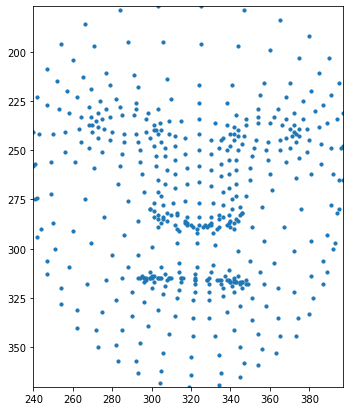

In [12]:
scle = 7
plt.rcParams["figure.figsize"] = (scle*16/9,scle)
plotface(datapoint)

In [13]:
xrr, yrr = gaze__processOneSession(session['hdehheeafrlqlylodn58si'], 10)
xrr.shape, yrr.shape

((124,), (124,))

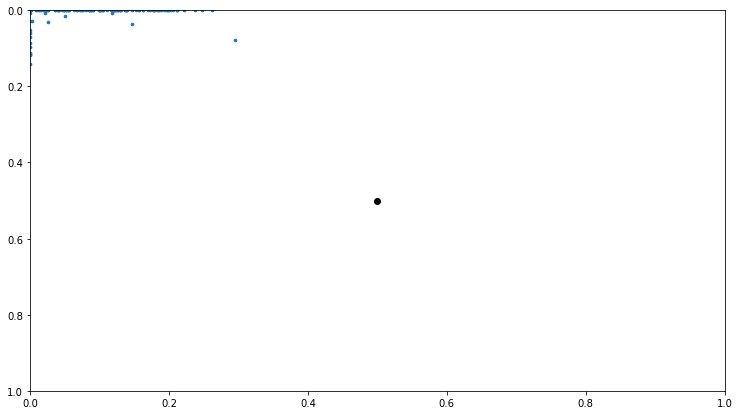

In [14]:
scle = 7
plt.rcParams["figure.figsize"] = (scle*16/9,scle)
plt.scatter(xrr, yrr, s=scle)
plt.xlim([0,1])
plt.ylim([0,1])
plt.gca().invert_yaxis()
plt.scatter(.5,.5, color='k')

In [15]:
# marker_track = {
#     "Position 1":   [.5, .5],
#     "Position 2":   [.1, .1],	
#     "Position 3":   [.1, .8],	
#     "Position 4":	[.8, .8],	
#     "Position 5":	[.8, .1],	
# }

accuracy_cords = [
    {'x': 50, 'y': 50},
    {'x': 10, 'y': 10},
    {'x': 10, 'y': 50},
    {'x': 10, 'y': 90},
    {'x': 50, 'y': 10},
    {'x': 50, 'y': 90},
    {'x': 90, 'y': 10},
    {'x': 90, 'y': 50},
    {'x': 90, 'y': 90},
]

marker_track = {}
for i in range(len(accuracy_cords)):
    marker_track["Position {}".format(i+1)] = [accuracy_cords[i]['x']/100, accuracy_cords[i]['y']/100]

print(len(marker_track.keys()))
marker_track

9


{'Position 1': [0.5, 0.5],
 'Position 2': [0.1, 0.1],
 'Position 3': [0.1, 0.5],
 'Position 4': [0.1, 0.9],
 'Position 5': [0.5, 0.1],
 'Position 6': [0.5, 0.9],
 'Position 7': [0.9, 0.1],
 'Position 8': [0.9, 0.5],
 'Position 9': [0.9, 0.9]}

In [16]:
with open("session_track.json", 'r') as f:
    session_track = json.load(f)

In [33]:
def loadjson_singleSession(session_name):
    folder = session_name.split('.json')[0]
    with open(path_root + folder + "/" + session_name, 'r') as f:
        session = json.load(f)
        if(len(session.keys()) != 1):
            print("this session has {} ids".format(len(session.keys())))
        ret_session = []
        ret_len = 0
        for id in session:
            if(len(session[id]) > ret_len):
                ret_len = len(session[id])
                ret_session = session[id]
        return ret_session

In [18]:
def plotHeatmap(xrr, yrr, subplot):
    heat_map = np.zeros((1001, 1001))
    for idx in range(xrr.shape[0]):
        xx = int(round(xrr[idx]*1000))
        yy = int(round(yrr[idx]*1000))

        xx = max(0, xx)
        xx = min(xx, 1000)
        yy = max(0, yy)
        yy = min(yy, 1000)

        heat_map[yy, xx] += 1
    print("heatmap shape", heat_map.shape)
    heatmap_reduced = skimage.measure.block_reduce(heat_map, (100,100), np.mean)
    print(heatmap_reduced.shape, heatmap_reduced.min(), heatmap_reduced.max())
    subplot.pcolormesh(np.arange(11), np.arange(11), heatmap_reduced, 
                    shading='gouraud', 
                    vmin=heatmap_reduced.min(), 
                    vmax=heatmap_reduced.max())
    subplot.invert_yaxis()


In [19]:
def calculate_MSE(xrr, yrr, marker_x, marker_y):
    ret = 0
    for idx in range(xrr.shape[0]):
        ret += (marker_x - xrr[idx])**2 + (marker_y - yrr[idx])**2
    return ret/xrr.shape[0]

In [23]:
not_valid = ["template", "P0", "P0_", "P17"]

def loadjson__multileSession(key, glass = -1, time_limit = 15):
    for participant in session_track:
        # print(" >> ", participant, " -- glass:", session_track[participant]["glass"])
        if participant in not_valid:
            continue
        if glass != -1 and session_track[participant]["glass"] != glass:
            continue

        print(" >> ", participant, " -- glass:", session_track[participant]["glass"])
        json_session = loadjson_singleSession(session_track[participant]['sessions'][key])
        xrr, yrr = gaze__processOneSession(json_session, time_limit)

        print(xrr.shape, yrr.shape)
        

In [37]:
# print("HI")
loadjson__multileSession("Position 2", glass=1)

 >>  P2  -- glass: 1
(399,) (399,)
 >>  P3  -- glass: 1
(339,) (339,)
 >>  P4  -- glass: 1
(383,) (383,)
 >>  P6  -- glass: 1
(85,) (85,)
 >>  P10  -- glass: 1
(125,) (125,)
 >>  P15  -- glass: 1
this session has 2 ids
(258,) (258,)
 >>  P22  -- glass: 1
(176,) (176,)
 >>  P24  -- glass: 1
(241,) (241,)
 >>  P29  -- glass: 1
(84,) (84,)
 >>  P31  -- glass: 1
this session has 2 ids
(203,) (203,)
 >>  P32  -- glass: 1
(268,) (268,)


Position 1
(270,) (270,)
(308,) (308,)
heatmap shape (1001, 1001)
(11, 11) 0.0 0.0029
heatmap shape (1001, 1001)
(11, 11) 0.0 0.0095
>>>>>>>>> ON >>>>>>>>>> mse = 0.04919095555555556
>>>>>>>>> OFF >>>>>>>>> mse = 0.04803270779220783
------------------------------------------------------------------------------------------------------------------
this session has 2 ids


IndexError: list index out of range

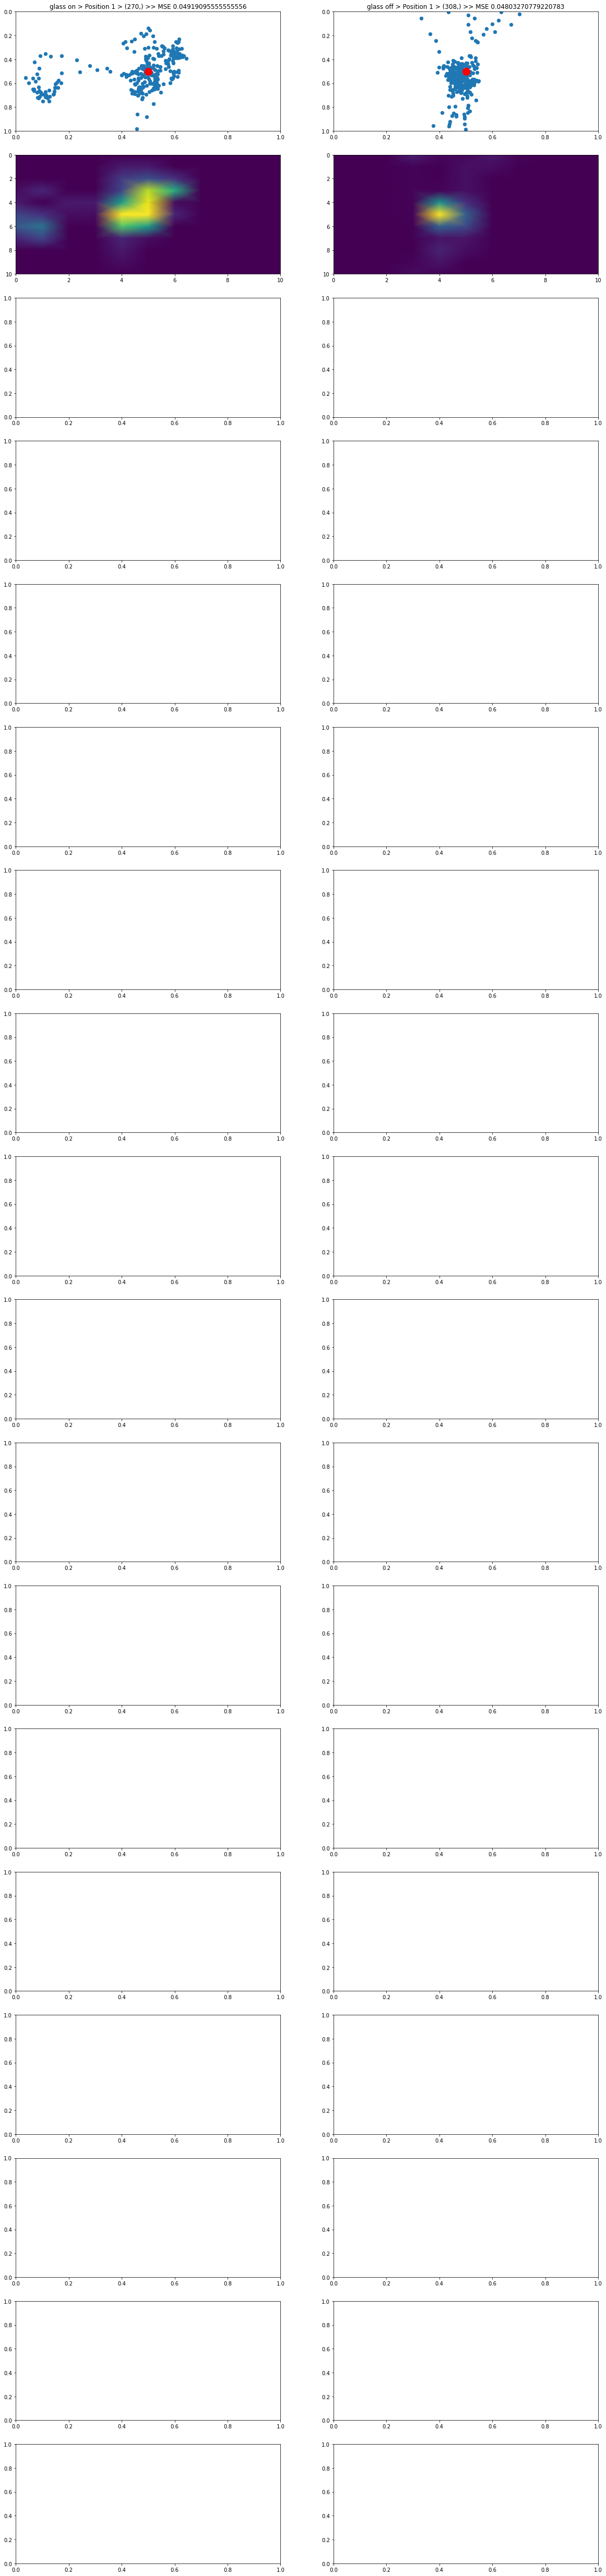

In [26]:
###################################################################################
comparison_column = 2
num_keys = 9
time_limit = 15
###################################################################################

col_fix = comparison_column
col_width = 20
plt.rcParams["figure.figsize"] = (col_width, (num_keys*col_width)/col_fix)
fig, ax = plt.subplots(nrows=num_keys*2, ncols=col_fix)


for i in range(1, len(marker_track.keys()) + 1):
    key = "Position {}".format(i)
    glass_on = loadjson_singleSession(session_track['P15']['sessions'][key])
    glass_off = loadjson_singleSession(session_track['P5']['sessions'][key])

    on_xrr, on_yrr = gaze__processOneSession(glass_on, time_limit)
    on_mse = calculate_MSE(on_xrr, on_yrr, marker_track[key][0], marker_track[key][1])
    
    off_xrr, off_yrr = gaze__processOneSession(glass_off, time_limit)
    off_mse = calculate_MSE(off_xrr, off_yrr, marker_track[key][0], marker_track[key][1])

    print(key)
    print(on_xrr.shape, on_yrr.shape)
    print(off_xrr.shape, off_yrr.shape)

    scle = 40
    sb_plot = ax[2*(i-1), 0]
    sb_plot.scatter(on_xrr, on_yrr, s=scle)
    sb_plot.set_xlim([0,1])
    sb_plot.set_ylim([0,1])
    sb_plot.invert_yaxis()
    sb_plot.scatter(marker_track[key][0], marker_track[key][1], color='red', s=scle*5)
    sb_plot.title.set_text("glass on > {} > {} >> MSE {}".format(key, on_xrr.shape, on_mse))

    sb_plot = ax[2*(i-1), 1]
    sb_plot.scatter(off_xrr, off_yrr, s=scle)
    sb_plot.set_xlim([0,1])
    sb_plot.set_ylim([0,1])
    sb_plot.invert_yaxis()
    sb_plot.scatter(marker_track[key][0], marker_track[key][1], color='red', s=scle*5)
    sb_plot.title.set_text("glass off > {} > {} >> MSE {}".format(key, off_xrr.shape, off_mse))

    plotHeatmap(on_xrr, on_yrr, ax[2*(i-1) + 1, 0])
    plotHeatmap(off_xrr, off_yrr, ax[2*(i-1) + 1, 1])

    print(">>>>>>>>> ON >>>>>>>>>> mse = {}".format(on_mse))
    print(">>>>>>>>> OFF >>>>>>>>> mse = {}".format(off_mse))
    print("------------------------------------------------------------------------------------------------------------------")